In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Heating Oil

## 7:3

In [2]:
# Đọc dữ liệu
data = pd.read_csv('Heating Oil Futures Historical Data.csv').dropna()

In [3]:
# Tiền xử lý dữ liệu
# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])
# Sắp xếp dữ liệu theo ngày
data.sort_values(by='Date', inplace=True)
# Đảo ngược dữ liệu để dự đoán giá trị trong tương lai
data = data.iloc[::-1].reset_index(drop=True)


In [4]:

# Chuyển đổi cột 'Vol.' thành số
# Chuyển đổi cột 'Change %' thành số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

data['Vol.'] = data['Vol.'] .apply(convert_volume_to_number)
data['Change %'] = data['Change %'].apply(convert_change_to_number)

In [5]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = data.reset_index()['Price']
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

0       2.5986
1       2.6218
2       2.6786
3       2.6534
4       2.6688
         ...  
1314    1.8270
1315    1.7784
1316    1.7692
1317    1.7420
1318    1.7006
Name: Price, Length: 1319, dtype: float64

In [6]:
# Chọn các đặc trưng để huấn luyện mô hình
features = ['High']
X = data[features].copy()
# Chọn cột 'Price' làm biến mục tiêu
y = data['Price']

In [7]:
# Số lượng mẫu cho tập huấn luyện (70%)
train_size = int(len(X) * 0.7)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]


In [8]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
predictions = model.predict(X_test)
predictions

array([1.257841  , 1.257841  , 1.253572  , 1.277326  , 1.266983  ,
       1.274521  , 1.20423187, 1.2113405 , 1.215836  , 1.227071  ,
       1.2126005 , 1.2330108 , 1.2330108 , 1.2330108 , 1.241189  ,
       1.23465109, 1.242963  , 1.2033695 , 1.213353  , 1.177898  ,
       1.162612  , 1.156966  , 1.149686  , 1.191052  , 1.2330108 ,
       1.213353  , 1.2084005 , 1.189442  , 1.180656  , 1.189972  ,
       1.102189  , 1.091151  , 1.146839  , 1.159937  , 1.131276  ,
       1.159937  , 1.13836   , 1.085867  , 1.086543  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.085867  ,
       1.085867  , 1.085867  , 1.085867  , 1.085867  , 1.08586

In [10]:

# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


MAE: 0.038323870238095
Root Mean Squared Error: 0.07941951728069391
Mean Absolute Percentage Error (MAPE): 3.680405649708714


In [11]:

# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.941054 1.909704 1.896307 1.894628 1.879088 1.894628 1.903591 1.9078
 1.882703 1.914029 1.894628 1.894425 1.876445 1.890767 1.895999 1.903591
 1.912344 1.903591 1.878531 1.895624 1.83231  1.892887 1.903591 1.865931
 1.869285 1.819525 1.807415 1.783974 1.738703 1.744265]


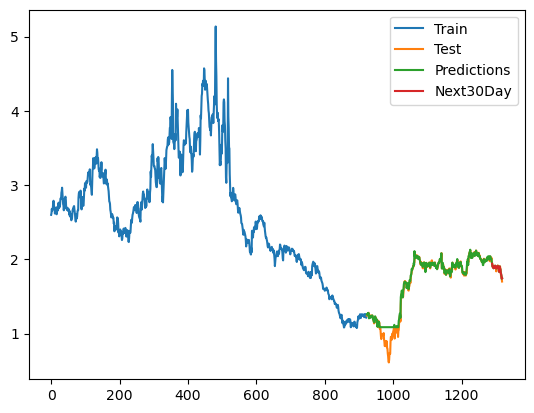

In [12]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])

plt.show()


## 8:2

In [13]:
# Số lượng mẫu cho tập huấn luyện (80%)
train_size = int(len(X) * 0.8)

# Chia dữ liệu thành tập train và tập test
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [14]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
predictions = model.predict(X_test)
predictions

array([1.857436  , 1.862725  , 1.882671  , 1.906463  , 1.910264  ,
       1.949333  , 1.926256  , 2.111834  , 2.037721  , 2.064219  ,
       2.015172  , 2.037294  , 2.041889  , 2.04337   , 2.040169  ,
       2.01687   , 2.038135  , 2.010421  , 2.038135  , 2.028628  ,
       2.014498  , 2.027978  , 1.991551  , 1.981016  , 1.951692  ,
       1.947035  , 1.925906  , 1.928991  , 1.950763  , 1.928408  ,
       1.910687  , 1.895538  , 1.906463  , 1.947035  , 1.950763  ,
       1.951692  , 1.928408  , 1.949333  , 1.928408  , 1.826468  ,
       1.88775   , 1.928991  , 1.949029  , 1.910687  , 1.906463  ,
       1.906463  , 1.910604  , 1.911706  , 1.928408  , 1.925906  ,
       1.949029  , 1.951692  , 1.911244  , 1.893763  , 1.949333  ,
       1.926256  , 1.926806  , 1.926538  , 1.936112  , 1.951692  ,
       1.926226  , 1.938306  , 1.949029  , 1.940318  , 1.937693  ,
       1.913732  , 1.951518  , 1.926226  , 1.910687  , 1.915731  ,
       1.887687  , 1.914258  , 1.872992  , 1.866513  , 1.88800

In [16]:

# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

MAE: 0.017235732323232167
Root Mean Squared Error: 0.02514421325593806
Mean Absolute Percentage Error (MAPE): 0.8943553745837166


In [17]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.940318 1.911244 1.899818 1.899612 1.882671 1.899612 1.906463 1.90934
 1.887687 1.913762 1.899612 1.892648 1.871372 1.88972  1.895261 1.906463
 1.913338 1.906463 1.87183  1.893894 1.832706 1.892264 1.906463 1.870063
 1.845669 1.818935 1.806857 1.765743 1.736986 1.742752]


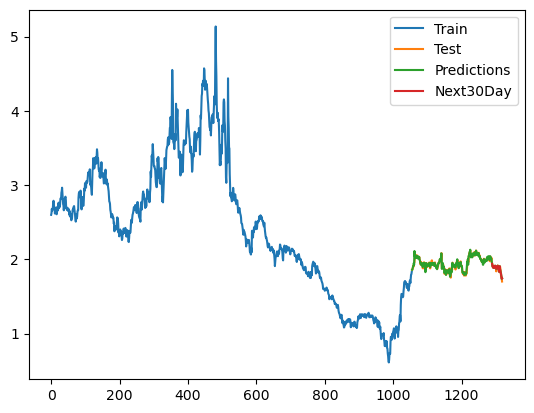

In [18]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()


## 9:1

In [20]:
# Số lượng mẫu cho tập huấn luyện (90%)
train_size = int(len(X) * 0.9)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [21]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
predictions = model.predict(X_test)
predictions

array([1.990688  , 1.97247   , 1.914769  , 1.89497   , 1.8998536 ,
       1.887423  , 1.950106  , 1.974765  , 1.944465  , 1.982263  ,
       1.962608  , 1.921337  , 1.914371  , 1.911554  , 1.889785  ,
       1.821107  , 1.811596  , 1.8286715 , 1.808954  , 1.830171  ,
       1.792861  , 1.8182515 , 1.811596  , 1.79679575, 1.807181  ,
       1.806796  , 1.79697   , 1.833708  , 1.893274  , 1.962608  ,
       1.979763  , 2.000304  , 1.974765  , 2.040645  , 2.041038  ,
       2.062779  , 2.007865  , 2.100163  , 2.12894   , 2.077787  ,
       2.025943  , 2.070663  , 2.040983  , 2.046621  , 2.025943  ,
       2.048801  , 2.080024  , 2.080451  , 2.077787  , 2.073291  ,
       2.077787  , 2.050956  , 2.017522  , 2.08693667, 2.09348467,
       2.109876  , 2.106353  , 2.062392  , 2.080451  , 2.07026   ,
       2.050956  , 2.08195   , 2.07026   , 2.083237  , 2.047046  ,
       2.043516  , 2.03226   , 2.007122  , 1.999104  , 2.00334   ,
       1.984096  , 1.985037  , 1.961947  , 1.973254  , 1.98154

In [23]:


# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

MAE: 0.014716391919191855
Root Mean Squared Error: 0.020118970756584552
Mean Absolute Percentage Error (MAPE): 0.7601173534108122


In [24]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[1.935847   1.925395   1.903163   1.90929    1.87872908 1.906045
 1.907069   1.908227   1.901469   1.899618   1.89497    1.887431
 1.873126   1.8829     1.893274   1.891795   1.913339   1.908911
 1.871802   1.893174   1.83681    1.8829     1.896319   1.8820995
 1.856044   1.807238   1.806837   1.765409   1.736986   1.742752  ]


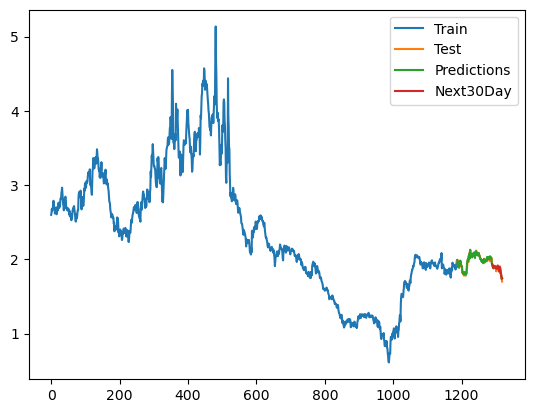

In [25]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()
